
# ETRM Data Analysis Project

This notebook performs **ETRM (Energy Trading and Risk Management) Data Analysis** using multiple file formats.
We will do following activities:
- Data ingestion (CSV, JSON, Excel, TXT, HTML, XML)
- Data cleaning and transformation
- Exploratory Data Analysis (EDA)
- Data visualization using **Matplotlib** and **Seaborn**

**Fields in dataset:**
- TradeID  
- Trader  
- Commodity  
- Volume  
- Price  
- Currency  
- DeliveryStart  
- DeliveryEnd  
- Periodicity  


**Visualizations planned:**
1. Bar chart - Total Volume by Commodity  
2. Pie chart - Trades by Currency  
3. Line chart - Average Price Trend by Delivery Start Date  
4. Histogram - Distribution of Notional Values  
5. Heatmap - Commodity vs Tradetype(Total Volume)  
6. Bar chart - Periodicity Analysis
7. Horizontal Bar chart - Top 10 Highest Value Trade



In [88]:
# 1. Import required libraries and set default plot style

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xml.etree.ElementTree as ET

# For cleaner plots
plt.style.use('seaborn-v0_8')
sns.set_palette("pastel")

In [89]:
# 2. Set Data Folder Path

DATA_DIR = "./data"

# List all files inside the data folder
file_list = os.listdir(DATA_DIR)
print("Files in data folder:", file_list)


Files in data folder: ['etrm_trades.csv', 'etrm_trades.html', 'etrm_trades.json', 'etrm_trades.txt', 'etrm_trades.xlsx', 'etrm_trades.xml']


In [90]:
# 3. Load All Files

def load_all_files(data_dir, file_list):
    loaded = {}
    for file_name in file_list:
        file_path = os.path.join(data_dir, file_name)
        
        # CSV
        if file_name.lower().endswith('.csv'):
            loaded['csv'] = pd.read_csv(file_path)
        
        # JSON
        elif file_name.lower().endswith('.json'):
            loaded['json'] = pd.read_json(file_path)
        
        # Excel
        elif file_name.lower().endswith(('.xls', '.xlsx')):
            loaded['excel'] = pd.read_excel(file_path)
        
        # Pipe-delimited TXT
        elif file_name.lower().endswith('.txt'):
            loaded['txt'] = pd.read_csv(file_path, sep='|')
        
        # HTML table
        elif file_name.lower().endswith('.html'):
            loaded['html'] = pd.read_html(file_path)[0]
        
        # XML
        elif file_name.lower().endswith('.xml'):
            tree = ET.parse(file_path)
            root = tree.getroot()
            rows = []
            for trade in root.findall('.//trade') + root.findall('.//Trade'):
                row = {child.tag: child.text for child in trade}
                rows.append(row)
            loaded['xml'] = pd.DataFrame(rows)
    return loaded

# Load datasets
loaded = load_all_files(DATA_DIR, file_list)

# Preview each loaded file
for k, df in loaded.items():
    print(f"\n--- {k.upper()} DataFrame ---")
    print(df.shape)
    display(df.head())


--- CSV DataFrame ---
(100, 9)


,TradeID,Commodity,TradeType,Volume,Price,Currency,DeliveryStart,DeliveryEnd,Periodicity
0,1,Power,BUY,193.52,191.13,GBP,2025-01-08,2025-01-16,Monthly
1,2,Gas,BUY,368.68,127.76,GBP,2025-01-29,2025-02-16,Quarterly
2,3,Power,SELL,86.45,48.08,USD,2025-01-03,2025-01-10,Daily
3,4,Gas,BUY,38.46,175.91,GBP,2025-01-23,2025-02-13,Daily
4,5,Coal,BUY,304.55,147.45,EUR,2025-01-09,2025-02-04,Quarterly



--- HTML DataFrame ---
(100, 9)


,TradeID,Commodity,TradeType,Volume,Price,Currency,DeliveryStart,DeliveryEnd,Periodicity
0,1,Power,BUY,193.52,191.13,GBP,2025-01-08,2025-01-16,Monthly
1,2,Gas,BUY,368.68,127.76,GBP,2025-01-29,2025-02-16,Quarterly
2,3,Power,SELL,86.45,48.08,USD,2025-01-03,2025-01-10,Daily
3,4,Gas,BUY,38.46,175.91,GBP,2025-01-23,2025-02-13,Daily
4,5,Coal,BUY,304.55,147.45,EUR,2025-01-09,2025-02-04,Quarterly



--- JSON DataFrame ---
(100, 9)


,TradeID,Commodity,TradeType,Volume,Price,Currency,DeliveryStart,DeliveryEnd,Periodicity
0,1,Power,BUY,193.52,191.13,GBP,2025-01-08,2025-01-16,Monthly
1,2,Gas,BUY,368.68,127.76,GBP,2025-01-29,2025-02-16,Quarterly
2,3,Power,SELL,86.45,48.08,USD,2025-01-03,2025-01-10,Daily
3,4,Gas,BUY,38.46,175.91,GBP,2025-01-23,2025-02-13,Daily
4,5,Coal,BUY,304.55,147.45,EUR,2025-01-09,2025-02-04,Quarterly



--- TXT DataFrame ---
(100, 9)


,TradeID,Commodity,TradeType,Volume,Price,Currency,DeliveryStart,DeliveryEnd,Periodicity
0,1,Power,BUY,193.52,191.13,GBP,2025-01-08,2025-01-16,Monthly
1,2,Gas,BUY,368.68,127.76,GBP,2025-01-29,2025-02-16,Quarterly
2,3,Power,SELL,86.45,48.08,USD,2025-01-03,2025-01-10,Daily
3,4,Gas,BUY,38.46,175.91,GBP,2025-01-23,2025-02-13,Daily
4,5,Coal,BUY,304.55,147.45,EUR,2025-01-09,2025-02-04,Quarterly



--- EXCEL DataFrame ---
(100, 9)


,TradeID,Commodity,TradeType,Volume,Price,Currency,DeliveryStart,DeliveryEnd,Periodicity
0,1,Power,BUY,193.52,191.13,GBP,2025-01-08,2025-01-16,Monthly
1,2,Gas,BUY,368.68,127.76,GBP,2025-01-29,2025-02-16,Quarterly
2,3,Power,SELL,86.45,48.08,USD,2025-01-03,2025-01-10,Daily
3,4,Gas,BUY,38.46,175.91,GBP,2025-01-23,2025-02-13,Daily
4,5,Coal,BUY,304.55,147.45,EUR,2025-01-09,2025-02-04,Quarterly



--- XML DataFrame ---
(100, 9)


,TradeID,Commodity,TradeType,Volume,Price,Currency,DeliveryStart,DeliveryEnd,Periodicity
0,1,Power,BUY,193.52,191.13,GBP,2025-01-08,2025-01-16,Monthly
1,2,Gas,BUY,368.68,127.76,GBP,2025-01-29,2025-02-16,Quarterly
2,3,Power,SELL,86.45,48.08,USD,2025-01-03,2025-01-10,Daily
3,4,Gas,BUY,38.46,175.91,GBP,2025-01-23,2025-02-13,Daily
4,5,Coal,BUY,304.55,147.45,EUR,2025-01-09,2025-02-04,Quarterly


In [91]:
# 4. Ensure Consistency Across Datasets

# Clean column names: remove spaces, standardize case
for key in loaded:
    loaded[key].columns = loaded[key].columns.str.strip().str.title()

# Merge all into one DataFrame
all_df = pd.concat(loaded.values(), ignore_index=True)

# Normalize Tradeid to remove extra spaces and ensure consistency
all_df['Tradeid'] = all_df['Tradeid'].astype(str).str.strip()

# Drop duplicates based on Tradeid
all_df.drop_duplicates(subset='Tradeid', inplace=True)

# Reset index
all_df.reset_index(drop=True, inplace=True)

# Final check
print("\nFinal combined dataframe shape:", all_df.shape)
display(all_df.head(200))



Final combined dataframe shape: (100, 9)


,Tradeid,Commodity,Tradetype,Volume,Price,Currency,Deliverystart,Deliveryend,Periodicity
0,1,Power,BUY,193.52,191.13,GBP,2025-01-08,2025-01-16,Monthly
1,2,Gas,BUY,368.68,127.76,GBP,2025-01-29,2025-02-16,Quarterly
2,3,Power,SELL,86.45,48.08,USD,2025-01-03,2025-01-10,Daily
3,4,Gas,BUY,38.46,175.91,GBP,2025-01-23,2025-02-13,Daily
4,5,Coal,BUY,304.55,147.45,EUR,2025-01-09,2025-02-04,Quarterly
...,...,...,...,...,...,...,...,...,...
95,96,Coal,SELL,55.62,181.5,EUR,2025-01-05,2025-01-26,Daily
96,97,Power,BUY,451.2,133.96,EUR,2025-01-06,2025-02-01,Daily
97,98,Coal,BUY,176.12,82.86,GBP,2025-01-30,2025-02-27,Daily
98,99,Power,SELL,365.72,181.48,USD,2025-01-22,2025-02-08,Monthly


In [92]:
# 5. Data Cleaning

# Convert numeric columns
all_df['Volume'] = pd.to_numeric(all_df['Volume'], errors='coerce')
all_df['Price'] = pd.to_numeric(all_df['Price'], errors='coerce')

# Convert dates
all_df['Deliverystart'] = pd.to_datetime(all_df['Deliverystart'], errors='coerce')
all_df['Deliveryend'] = pd.to_datetime(all_df['Deliveryend'], errors='coerce')

# Drop rows with critical missing values
all_df.dropna(subset=['Volume', 'Price', 'Commodity', 'Currency'], inplace=True)

# Reset index
all_df.reset_index(drop=True, inplace=True)

print("\nAfter cleaning:")
display(all_df.info())


After cleaning:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Tradeid        100 non-null    object        
 1   Commodity      100 non-null    object        
 2   Tradetype      100 non-null    object        
 3   Volume         100 non-null    float64       
 4   Price          100 non-null    float64       
 5   Currency       100 non-null    object        
 6   Deliverystart  100 non-null    datetime64[ns]
 7   Deliveryend    100 non-null    datetime64[ns]
 8   Periodicity    100 non-null    object        
dtypes: datetime64[ns](2), float64(2), object(5)
memory usage: 7.2+ KB


None

In [93]:
 #6. Feature Engineering

# Add Notional Value (Volume * Price)
all_df['Notional'] = all_df['Volume'] * all_df['Price']

In [94]:
# 7. Exploratory Data Analysis (EDA)

# 7.1 Average price per commodity
avg_price_commodity = all_df.groupby('Commodity')['Price'].mean().sort_values(ascending=False)
print("\nAverage Price per Commodity:")
display(avg_price_commodity)

# 7.2 Distribution of trades by currency
currency_distribution = all_df['Currency'].value_counts()
print("\nTrades by Currency:")
display(currency_distribution)

# 7.3 Trade periodicity breakdown
periodicity_counts = all_df['Periodicity'].value_counts()
print("\nTrade Periodicity Breakdown:")
display(periodicity_counts)




Average Price per Commodity:


Commodity
Gas      119.778437
Coal     104.642941
Oil      101.757826
Power    100.469643
Name: Price, dtype: float64


Trades by Currency:


Currency
GBP    38
USD    34
EUR    28
Name: count, dtype: int64


Trade Periodicity Breakdown:


Periodicity
Daily        41
Quarterly    31
Monthly      28
Name: count, dtype: int64

<Figure size 1000x600 with 0 Axes>

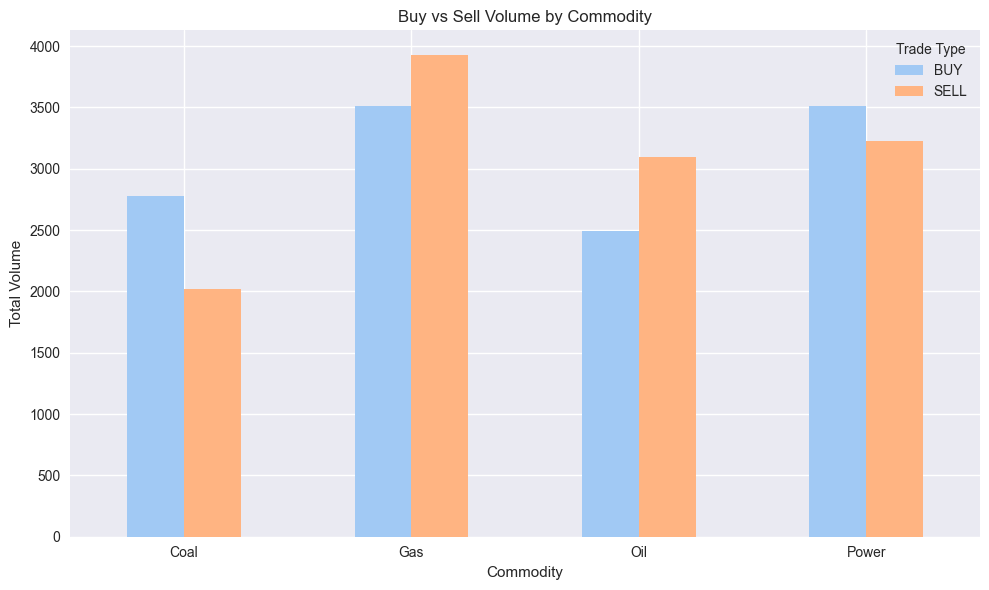

In [95]:
# 8. Data Visualization

# 8.1 Bar Chart: Total Volume by Commodity
buy_sell_volume = all_df.groupby(['Commodity', 'Tradetype'])['Volume'].sum().reset_index()
buy_sell_pivot = buy_sell_volume.pivot(index='Commodity', columns='Tradetype', values='Volume').fillna(0)
plt.figure(figsize=(10,6))
buy_sell_pivot.plot(kind='bar', figsize=(10,6))
plt.title("Buy vs Sell Volume by Commodity")
plt.ylabel("Total Volume")
plt.xlabel("Commodity")
plt.xticks(rotation=0)
plt.legend(title="Trade Type")
plt.tight_layout()
plt.show()



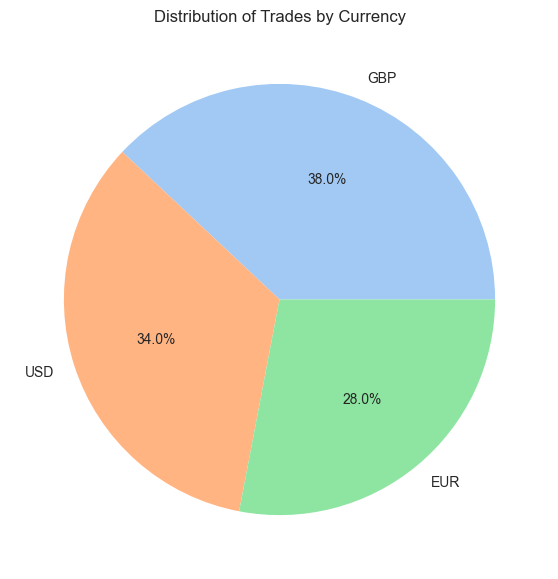

In [96]:
# 8.2 Pie Chart: Trades by Currency
plt.figure(figsize=(7,7))
all_df['Currency'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title("Distribution of Trades by Currency")
plt.ylabel("")
plt.show()

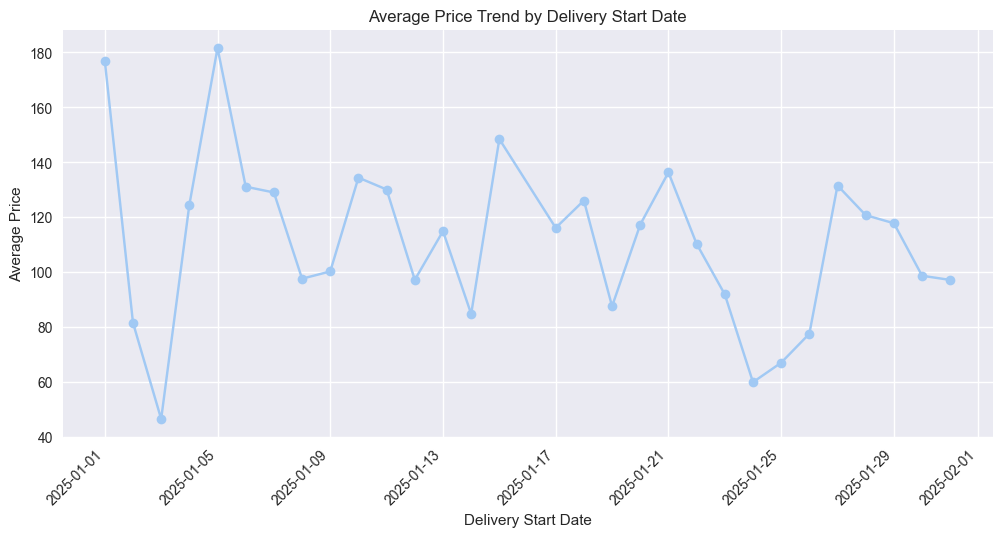

In [97]:
# 8.3 Line Chart: Average Price Trend Over Time
avg_price_by_date = all_df.groupby('Deliverystart')['Price'].mean()
plt.figure(figsize=(12,6))
avg_price_by_date.plot(kind='line', marker='o')
plt.title("Average Price Trend by Delivery Start Date")
plt.ylabel("Average Price")
plt.xlabel("Delivery Start Date")
plt.xticks(rotation=45)
plt.show()

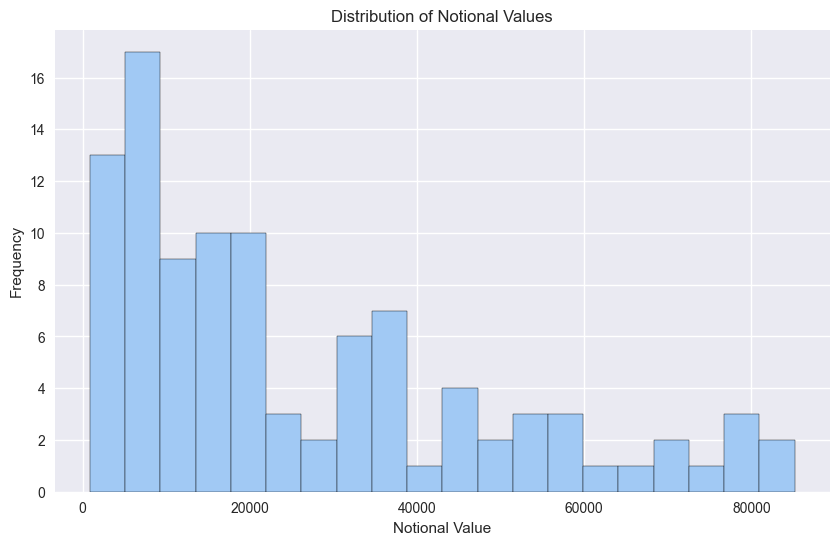

In [98]:
# 8.4 Histogram: Distribution of Notional Values
plt.figure(figsize=(10,6))
plt.hist(all_df['Notional'], bins=20, edgecolor='black')
plt.title("Distribution of Notional Values")
plt.xlabel("Notional Value")
plt.ylabel("Frequency")
plt.show()

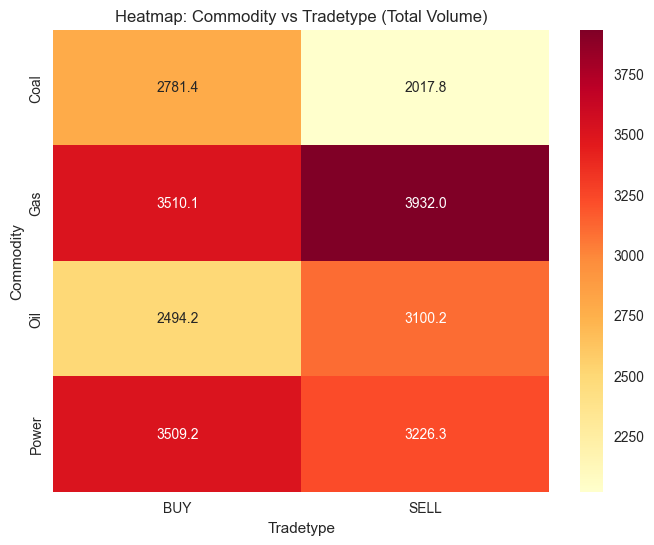

In [99]:
# 8.5 Heatmap: Commodity vs Tradetype (Total Volume)
pivot = pd.pivot_table(
    all_df,
    values='Volume',
    index='Commodity',
    columns='Tradetype',
    aggfunc='sum',
    fill_value=0
)
plt.figure(figsize=(8,6))
sns.heatmap(pivot, annot=True, fmt='.1f', cmap='YlOrRd')
plt.title("Heatmap: Commodity vs Tradetype (Total Volume)")
plt.show()


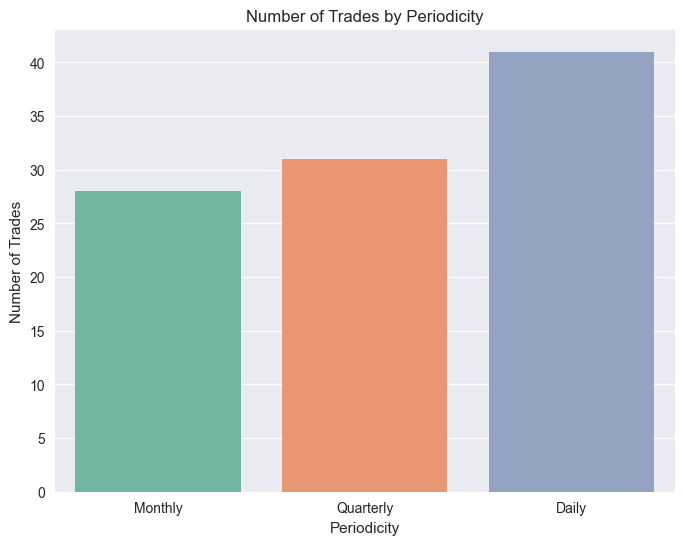

In [100]:
# 8.6 Periodicity Analysis

plt.figure(figsize=(8,6))
sns.countplot(
    data=all_df,
    x='Periodicity',
    hue='Periodicity',   
    palette='Set2',
    legend=False        
)

plt.title("Number of Trades by Periodicity")
plt.xlabel("Periodicity")
plt.ylabel("Number of Trades")
plt.show()


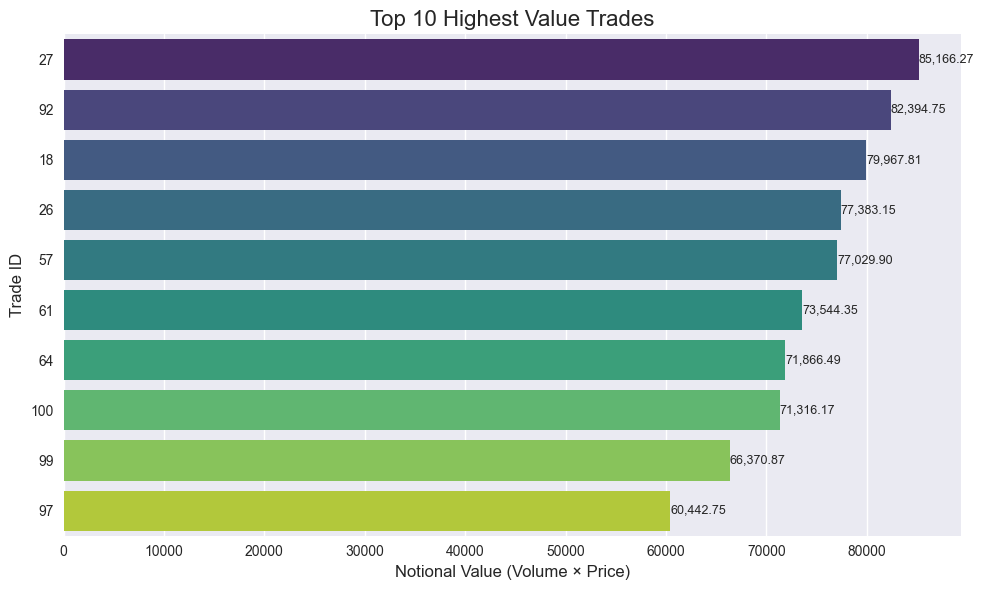

In [101]:
# 8.7 Top 10 Highest Value Trades

# Sort and take top 10
top_trades = all_df.sort_values(by='Notional', ascending=False).head(10).copy()

# Plot horizontal bar chart
plt.figure(figsize=(10,6))
sns.barplot(
    data=top_trades,
    x='Notional',
    y='Tradeid',
    hue='Tradeid',          
    palette='viridis',
    legend=False             
)

plt.title("Top 10 Highest Value Trades", fontsize=16)
plt.xlabel("Notional Value (Volume × Price)", fontsize=12)
plt.ylabel("Trade ID", fontsize=12)

# Add value labels directly on bars
for index, value in enumerate(top_trades['Notional']):
    plt.text(value, index, f'{value:,.2f}', va='center', fontsize=9)

plt.tight_layout()
plt.show()
